# Part 2: Problem Statement and Dataset

## Movie Genre Classification

### Problem Statement

*I will build a multi-class classification model using the MovieLens dataset to automatically predict movie genres (achievable with SVM or Naive Bayes). Success will be measured by accuracy (at least 80%) and a balance between precision and recall. This project can improve movie recommendation systems (streaming services), target marketing campaigns (studios), and genre-based movie discovery for users (all within the designated timeframe).*

### Proposed Methods and Models

**Data Preprocessing and Cleaning:**

-Address missing values and inconsistencies.

-Preprocess textual data (plot keywords) for machine learning compatibility (tokenization, stemming).

**Feature Engineering (Optional):**

-Create new features from existing ones to potentially improve model performance (e.g., combining budget and revenue for production scale).

**Model Selection and Training:**

-Implement classification algorithms like Support Vector Machines or Naive Bayes.

-Train the model on the preprocessed MovieLens dataset.

**Model Evaluation:**

-Evaluate model performance using accuracy, precision, and recall.

### Data Source and Risks/Assumptions

**Data Source:** *Kaggle (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)*

**Risks and Assumptions:**

-Potential genre bias within the dataset. I need to explore data balancing techniques if certain genres are underrepresented.

-Data quality and accuracy might require additional cleaning and validation steps.

-The model's performance might be influenced by the chosen features and algorithms. I might need to explore alternative options for improvement.

### Success Criteria Refinement

*Based on the chosen metrics, success will be determined by:*

-Achieving at least 80% accuracy in genre prediction.

-Maintaining a balance between precision and recall to ensure the model accurately identifies movies within each genre and avoids misclassifications.

### Data Source Documentation

*The MovieLens dataset provides the primary data source for this project. Key components include:*

-movies_metadata.csv: Contains information on movies (budget, revenue, plot keywords, cast, crew).

-keywords.csv: Provides details about movie plot keywords.

-credits.csv (Optional): Offers details about cast and crew (potentially relevant for genre prediction).

*I will utilize the CSV files and potentially explore the full dataset (including user ratings) if time allows, considering the additional processing required for sentiment analysis.*

### import data

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading a csv into a DataFrame

In [14]:
movies_df = pd.read_csv('movies_metadata.csv')

C:\Users\zarif\AppData\Local\Temp\ipykernel_13636\4225916005.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv('movies_metadata.csv')


In [15]:
type(movies_df)

pandas.core.frame.DataFrame

### Exploratory Data Analysis (EDA)

In [16]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
# Check the shape of the dataframe
movies_df.shape

(45466, 24)

In [10]:
# Get a summary of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [23]:
# Check for missing values
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
id                           0
original_language           11
original_title               0
overview                   954
popularity                   3
production_companies         3
production_countries         3
release_date                87
revenue                      0
runtime                      0
spoken_languages             3
status                      84
tagline                  25051
title                        3
vote_average                 3
vote_count                   3
dtype: int64

In [24]:
# Get basic statistics of the dataframe
movies_df.describe()

,budget,release_date,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45376,4.546300e+04,45463.000000,45460.000000,45460.000000
mean,4.224579e+06,1992-05-15 17:10:50.564174848,1.110005e+07,94.133185,5.618207,109.897338
min,0.000000e+00,1874-12-09 00:00:00,-2.147484e+09,0.000000,0.000000,0.000000
25%,0.000000e+00,1978-10-06 00:00:00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,2001-08-30 00:00:00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,2010-12-17 00:00:00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2020-12-16 00:00:00,2.068224e+09,1256.000000,10.000000,14075.000000
std,1.742413e+07,NaN,6.380645e+07,38.297881,1.924216,491.310374


### Clean the data

In [25]:


# Step 1: Identify Non-Numeric Values in 'budget' and 'revenue' columns
def is_number(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# Filter rows with non-numeric values in 'budget' or 'revenue'
non_numeric_budget = movies_df[~movies_df['budget'].apply(is_number)]
non_numeric_revenue = movies_df[~movies_df['revenue'].apply(is_number)]

print("Non-numeric values in 'budget':")
print(non_numeric_budget[['budget']])

print("Non-numeric values in 'revenue':")
print(non_numeric_revenue[['revenue']])

# Step 2: Remove or Handle Non-Numeric Values
movies_df = movies_df[movies_df['budget'].apply(is_number)]
movies_df = movies_df[movies_df['revenue'].apply(is_number)]

# Convert 'budget' and 'revenue' columns to float and then to int
movies_df['budget'] = movies_df['budget'].astype(float).astype(int)
movies_df['revenue'] = movies_df['revenue'].astype(float).astype(int)

# Check available columns
print("Available columns:")
print(movies_df.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['homepage', 'imdb_id', 'poster_path', 'video']
existing_columns_to_drop = [col for col in columns_to_drop if col in movies_df.columns]
movies_df = movies_df.drop(columns=existing_columns_to_drop, axis=1)

# Drop rows with missing values in the 'genres' column
movies_df = movies_df.dropna(subset=['genres'])

# Handle missing values in other columns (fill with appropriate values or drop)
movies_df = movies_df.fillna({'runtime': movies_df['runtime'].median()})

# Convert 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Verify conversion
print("Conversion of 'release_date':")
print(movies_df['release_date'].head())

# Drop rows with invalid release dates
movies_df = movies_df.dropna(subset=['release_date'])

# Extract year from release date
movies_df['release_year'] = movies_df['release_date'].dt.year

# Verify extraction
print("Extraction of 'release_year':")
print(movies_df['release_year'].head())

# Remove duplicates
movies_df = movies_df.drop_duplicates()

# Clean the 'genres' column (assuming it's a list of dictionaries)
import ast
def parse_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        genres = [genre['name'] for genre in genres_list]
        return genres
    except ValueError:
        return []

movies_df['genres'] = movies_df['genres'].apply(parse_genres)

# Display the cleaned dataframe
print(movies_df.head())



Non-numeric values in 'budget':
Empty DataFrame
Columns: [budget]
Index: []
Non-numeric values in 'revenue':
Empty DataFrame
Columns: [revenue]
Index: []
Available columns:
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')
Conversion of 'release_date':
0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]
Extraction of 'release_year':
0    1995
1    1995
2    1995
3    1995
4    1995
Name: release_year, dtype: int32
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   

### Conduct EDA

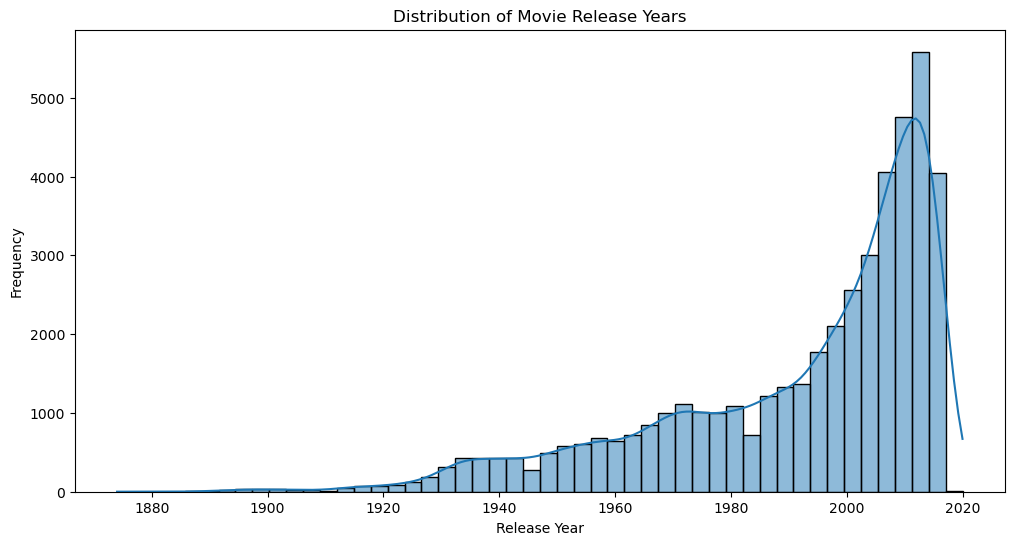

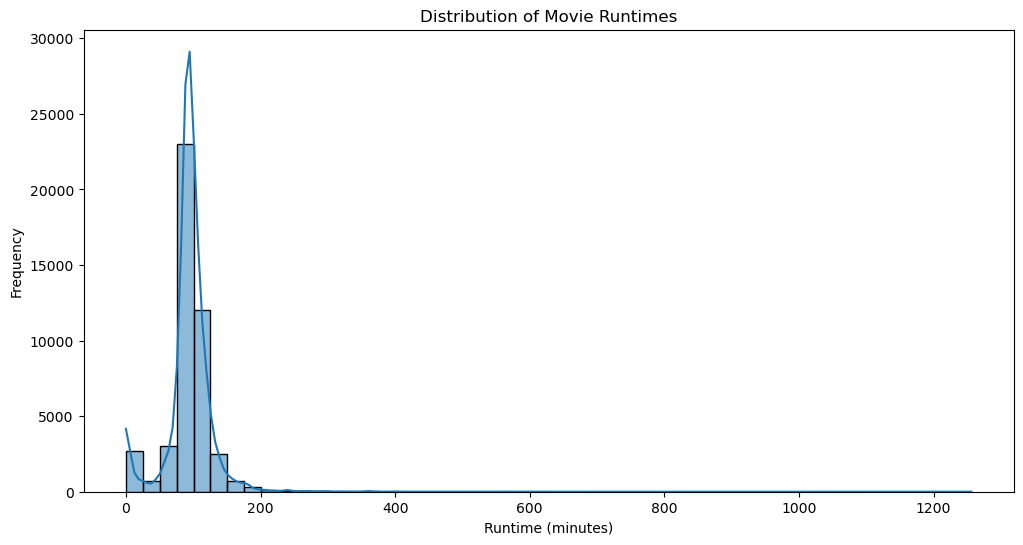

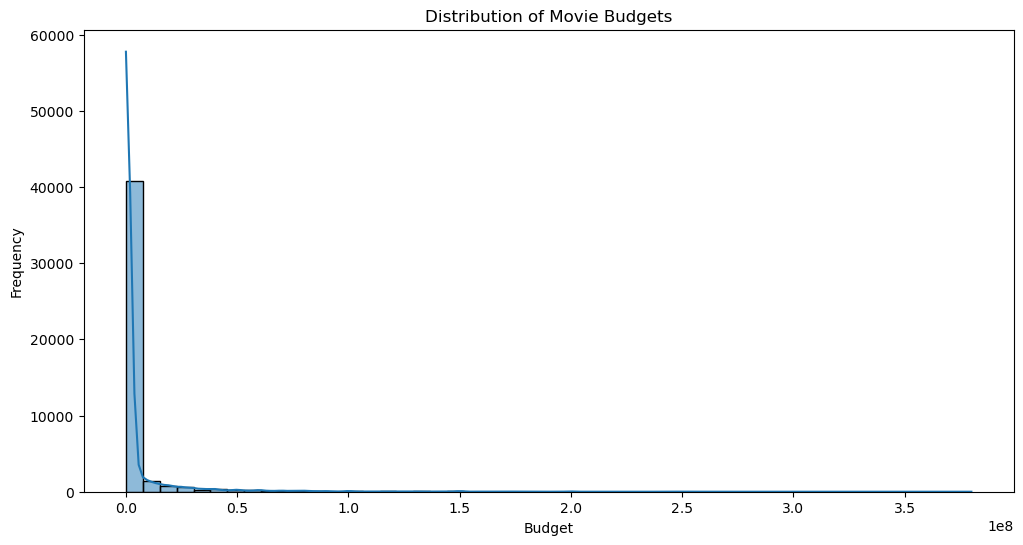

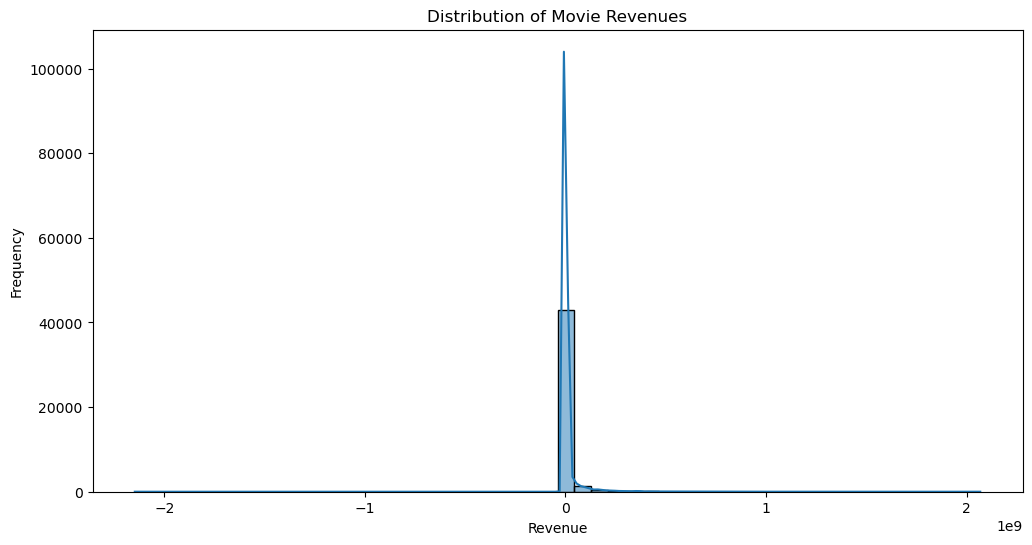

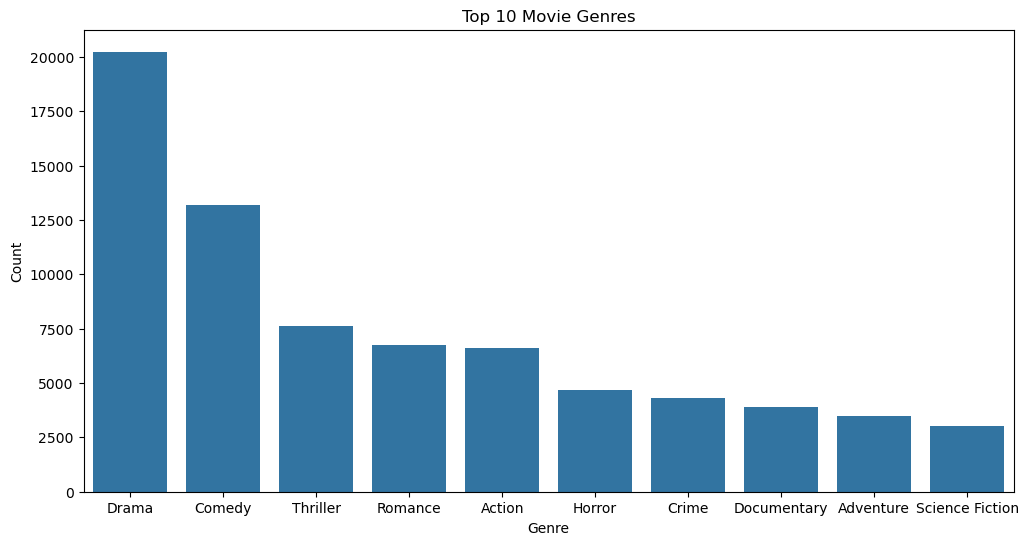

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of movie release years
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['release_year'], bins=50, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of movie runtimes
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['runtime'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of budgets
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['budget'], bins=50, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of revenues
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['revenue'], bins=50, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Plot the top 10 genres
from collections import Counter

all_genres = [genre for sublist in movies_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
top_genres = genre_counts.most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()
